In [1]:
import numpy as np
import matplotlib.pyplot as plt 

from scipy.stats import alpha, beta, arcsine, argus, betaprime

In [2]:
def gen_fake_data(nelements = 10000):
    data = np.zeros(nelements, dtype=[("a", float), ("b", float), ("c", float), ("d", float)])

    a, b = 2.3, 0.8
    data['a'] = beta.pdf(np.linspace(beta.ppf(0.01, a, b),
                               beta.ppf(0.99, a, b), nelements)
                               ,a, b)
    a, b = 1.3, 1.2
    data['b'] = beta.pdf(np.linspace(beta.ppf(0.01, a, b),
                                beta.ppf(0.99, a, b), nelements)
                               ,a, b) + \
                arcsine.pdf(np.linspace(arcsine.ppf(0.01),
                    arcsine.ppf(0.99),  nelements))
    chi=1
    a = 3.7
    data['c'] = argus.pdf(np.linspace(argus.ppf(0.01, chi),
                                argus.ppf(0.99, chi), nelements)
                                ,chi) +\
                alpha.pdf(np.linspace(alpha.ppf(0.01, a),
                                alpha.ppf(0.99, a), nelements)
                                ,a)
    chi = 0.3
    data['d'] = argus.pdf(np.linspace(argus.ppf(0.01, chi),
                                argus.ppf(0.99, chi), nelements)
                                ,chi)
    return data

Text(0.5, 0.98, 'Original data distribution')

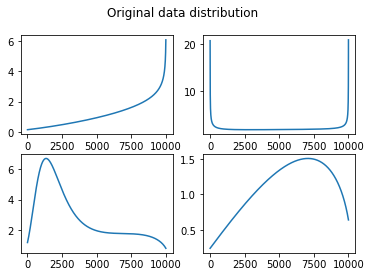

In [4]:
data = gen_fake_data(10000)
fig, axs = plt.subplots(2,2)
axs[0,0].plot(data['a'])
axs[0,1].plot(data['b'])
axs[1,0].plot(data['c'])
axs[1,1].plot(data['d'])
fig.suptitle("Original data distribution")

### Use Case 1: 
기업1의 민감정보 a, b, c의 전체 기업에 대한 백분율 / rank 계산하여 투자 적합성, f(a,b,c)를 계산

In [ ]:
from fhe import Server, Client

# 모든 민감 데이터를 암호화하여 가지고 있는 서버
server = Server(login_method, data=data)

# user는 서버와 연결하고, 서버에서 제공하는 encryption key로 자신의 데이터를 암호화.
user = Client(server.Encrypt_key)

In [ ]:
user.set_data = {'a':0.1, 'b':2, 'c':3, 'd':0.2}
user.encrypt()

In [19]:
class FHE_Server:
    def __init__(self):
        pass
    
    def login(self):
        pass
        

class Server_Complex_algorithm(FHE_Server):
    def __init__(self):
        super().__init__()
        pass
    
    def expected_company_value(self, company_data):
        """run some FHE algorithms"""
        return 
    
    def is_company_unicorn(self, company_data):
        """determine if the company is unicorn."""
        return 

    def invest_score(self, data):
        """do something"""
        ev = self.fhe_evaluator
        # check for fields
        if self._check_feild_avail(data):
            rank_a = ev.get_univariate_rank(data, dataset="통계청기업정보1", field = "a")
            rank_b = ev.get_univariate_rank(data, dataset="통계청기업정보1", field = "b")
            rank_c = ev.get_univariate_rank(data, dataset="통계청기업정보1", field = "c")
        else:
            raise ValueError
            
        return a+b*c

In [8]:
fitness = server.invest_score(user.data)


print(f"A회사는 투자 적합도가 {fitness:.2f}%입니다.")

A회사는 투자 적합도가 85.32%입니다.


## Use Case 2:
민감정보의 활용을 장려하기 위해 모델 distribution을 제공

0. 민감정보는 암호화 되어있음
1. 민감정보 a,b,c,d에 대한 통계적 특성 계산 (min, max, mean, mode, moments, quantile 등등...)
2. 특정 분포 모델을 가정하여 민감정보 a,b,c,d의 원래 분포를 재건
3. 재건된 가짜 데이터에 대해 후속 분석 진행 

In [ ]:
from fhe import Server, Client

# FHE 연산이 가능한 서버. 데이터는 User 소유.
server = Server(login_method, data=data)

# user는 서버와 연결하고, user가 secret key를 생성
user = Client(server.Encrypt_key)

In [ ]:
# send encrypted data
enc_summary_stat = server.summary_stat(field="a_very_important_property", dataset='통계청기업정보1')


summary_stat = user.decrypt(enc_summary_stat)
summary_stat_multi_dim = server.summary_stat(field=["a_very_important_property", "another_property"],
                                           dataset='통계청기업정보1')

In [20]:
summary_stat = {'n_elements':50000000, 
                'mean':10.3,
                'mode':7.124,
                'min': 0.2,
                'max': 30.06,
                'q1': 22.93,
                'q3': 4.2,
                'var':10.59,
                'std':3.25423,
                'skewness':0.64,
                'kurtosis':2.93}

In [21]:
print(summary_stat)

{'n_elements': 50000000, 'mean': 10.3, 'mode': 7.124, 'min': 0.2, 'max': 30.06, 'q1': 22.93, 'q3': 4.2, 'var': 10.59, 'std': 3.25423, 'skewness': 0.64, 'kurtosis': 2.93}


In [22]:
def guess_org_dist(summary_stat):
    """some fancy statstical technic + good enough assumptions"""
    pass
    return 

In [ ]:
recovered_dist = guess_org_dist(summary_stat) #recovered_dist = betaprime(13,2) 

In [33]:
x = np.linspace(summary_stat['min'], summary_stat['max'], summary_stat['n_elements'])

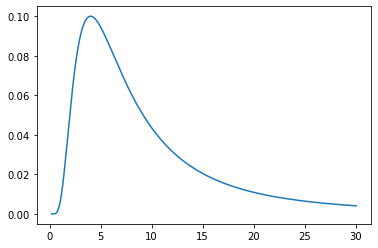

In [36]:
plt.plot(x, recovered_dist.pdf(x))

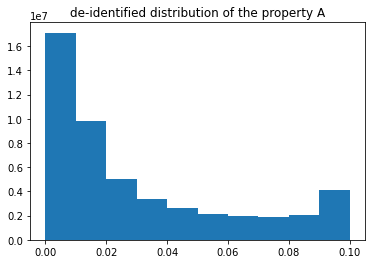

In [44]:
plt.hist(recovered_dist.pdf(x))
plt.title("de-identified distribution of the property A")
plt.show()